## Unsupervised learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
df_uml_01 = pd.read_csv('./output/data_02.csv',sep=',',index_col=0)

In [3]:
df_uml_01['DateTime'] = pd.to_datetime(df_uml_01['DateTime'])
df_uml_01['DayWeekName'] = df_uml_01['DateTime'].dt.day_name()

In [4]:
df_uml_col01 = [col for col in df_uml_01.columns.values if col not in ['DateTime','DayWeek','DayWeekName']]

In [5]:
%%time
K = 7
kmeans = KMeans(n_clusters=K)
clusters_01 = kmeans.fit(df_uml_01[df_uml_col01])
clusters_01.cluster_centers_.shape

CPU times: user 1.66 s, sys: 1.86 s, total: 3.51 s
Wall time: 954 ms


In [6]:
%%time
df_uml_01['Cluster'] = clusters_01.fit_predict(df_uml_01[df_uml_col01])

CPU times: user 1.4 s, sys: 1.57 s, total: 2.97 s
Wall time: 794 ms


In [7]:
df_uml_01.DayWeekName.value_counts()

Monday       2448
Friday       2448
Wednesday    2448
Tuesday      2448
Thursday     2448
Sunday       2448
Saturday     2448
Name: DayWeekName, dtype: int64

In [8]:
df_uml_01.Cluster.value_counts()

5    15952
0      718
2      227
6      126
1       81
3       25
4        7
Name: Cluster, dtype: int64

In [9]:
for c in range(K):
    display("Cluster {}".format(c))
    display(df_uml_01[df_uml_01.Cluster == c].DayWeekName.value_counts().head())

'Cluster 0'

Wednesday    146
Saturday     118
Tuesday      113
Friday       104
Monday       101
Name: DayWeekName, dtype: int64

'Cluster 1'

Thursday     21
Friday       15
Monday       15
Wednesday    12
Tuesday      10
Name: DayWeekName, dtype: int64

'Cluster 2'

Thursday     49
Friday       41
Tuesday      36
Wednesday    30
Monday       29
Name: DayWeekName, dtype: int64

'Cluster 3'

Thursday     9
Wednesday    4
Saturday     3
Friday       3
Monday       3
Name: DayWeekName, dtype: int64

'Cluster 4'

Thursday     3
Tuesday      2
Wednesday    1
Friday       1
Name: DayWeekName, dtype: int64

'Cluster 5'

Sunday      2369
Monday      2279
Saturday    2277
Friday      2268
Tuesday     2267
Name: DayWeekName, dtype: int64

'Cluster 6'

Thursday     28
Monday       21
Saturday     19
Wednesday    17
Tuesday      17
Name: DayWeekName, dtype: int64

In [10]:
df_unml_sample = df_uml_01[df_uml_col01].sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
df_unml_sample_hier = hier_clust.fit(df_unml_sample)

In [11]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    fig = plt.figure(figsize=(15,15))
    dendrogram(linkage_matrix, **kwargs)


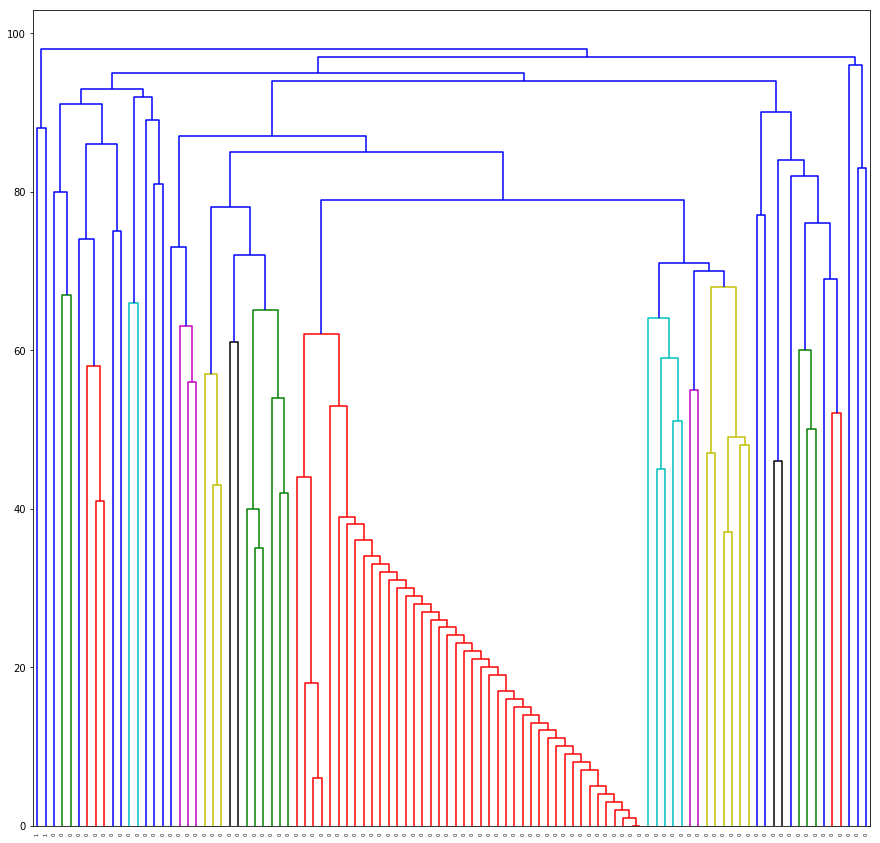

In [12]:
plot_dendrogram(df_unml_sample_hier, labels=df_unml_sample_hier.labels_)

## 2 day types

In [13]:
df_uml_02 = pd.read_csv('./output/data_02.csv',sep=',',index_col=0)

In [14]:
df_uml_02.head()

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,2010-05-11 00:00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-05-11 00:10:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-05-11 00:20:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-05-11 00:30:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-05-11 00:40:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_uml_02['DateTime'] = pd.to_datetime(df_uml_02['DateTime'])
df_uml_02['DayWeek'] = df_uml_02['DateTime'].dt.dayofweek

In [16]:
#df_uml_02.dtypes

In [17]:
def week_weekend(day):
    weekend_list = [6,7]
    if day in weekend_list:
        day = 'Weekend'
    else:
        day = 'WorkingDay'
    return day

In [18]:
df_uml_02['DayWeek'] = df_uml_02['DayWeek'].apply(week_weekend)

In [19]:
df_uml_col02 = [col for col in df_uml_02.columns.values if col not in ['DateTime','DayWeek','DayWeekName']]

In [20]:
%%time
K = 2
kmeans = KMeans(n_clusters=K)
clusters_02 = kmeans.fit(df_uml_02[df_uml_col02])
clusters_02.cluster_centers_.shape

CPU times: user 650 ms, sys: 658 ms, total: 1.31 s
Wall time: 456 ms


In [21]:
%%time
df_uml_02['Cluster'] = clusters_02.fit_predict(df_uml_02[df_uml_col02])

CPU times: user 625 ms, sys: 642 ms, total: 1.27 s
Wall time: 411 ms


In [22]:
df_uml_02.DayWeek.value_counts()

WorkingDay    14688
Weekend        2448
Name: DayWeek, dtype: int64

In [23]:
df_uml_02.Cluster.value_counts()

0    16817
1      319
Name: Cluster, dtype: int64